# Insights into the secret world of housing prices - Abhiram, Mihir, Samrit, Suzie
# Summer 2024 Data Science Project
Housing prices are often looked as a black box with differing perspectives of the price determination like size of the house, location, and with some even feeling like it's completely random. We, along with a lot of people across the United States, one day envision owning homes making it important for us to get a deeper understanding of the topic. Throughout the process - from dataset collection to conclusion development - we kept in mind considerations that many people can relate to when purchasing a home such as does it feel more expensive to buy a home in summer vs winter or do homes with larger prices have lots of bathrooms. Our dataset was collected on Kaggle.com and has 19(?) features along with the target variable of price sold. We hope that one day housing prices calculations can be as simple as plugging in the values of the features and getting an exact estimate for one's house value. This would enable individuals to optimize for the factors that are the most valuable to them while staying under budget.

# Data Collection

We are choosing the Housing Prices Dataset set from Sukhmandeep Singh Brar. This housing price dataset provides a comprehensive collection of property listings, encompassing various attributes such as the number of bedrooms, bathrooms, living area size, lot size, and zip codes, all gathered from house listings in and around Seattle. We found this dataset on Kaggle from the original author.

We’ve chosen this dataset for its large size (2.52 MB) and for the large number of features associated with each house listing, totaling 21 features for each house. It is also localized to a single area (Seattle) which will allow us to extract specific and in-depth insights

Through this dataset, we aim to analyze and determine the effect of various features such as zip code, number of floors, number of bedrooms, square footage, and more on the estimated price of a house.


We are choosing this dataset to understand and analyze which house features best predict the price and which variables affect housing prices most severely. We will leverage several techniques including regression modeling to determine the value of a house based on various input variables.

Source Dataset link:
https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset

As our team used google colab for much of this there are some code cells that account for runs on google colab, however much of the visualization can only be done locally so these cells will be commented out when submitted

In [1]:
#for google colab
#from google.colab import drive
#drive.mount('/content/drive')

We perform all relevant imports and read in our primary dataset

In [2]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import folium
import geopandas as gpd

#make sure the csv is in your top level drive directory, if you try and put it in a subfolder then that filepath becomes invalid for the others
data = pd.read_csv('Housing.csv')
#data = pd.read_csv('/content/drive/My Drive/Housing.csv')
#data = pd.read_csv('/content/drive/My Drive/cmsc320-finalproject/Housing.csv')

# Data Processing

Perform data cleaning and encoding of data types in incorrect/unusable formats

We also perform feature creation, it may be useful to have additional data such as the total number of rooms in a house and the price per square footage

In [3]:
data = pd.read_csv('Housing.csv')
#parse


#handling NaNs
print(data.isnull().sum())

data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].median()) # Filling missing values
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].median())

data.dropna(subset=['price'], inplace=True) # Dropping rows where the 'price' is missing

data['yr_renovated'] = data['yr_renovated'].fillna(0) # Filling 'yr_renovated' with 0 where NaNs may imply no renovation


#string converts
data['date'] = pd.to_datetime(data['date'])
data['id'] = data['id'].astype(str)


#encoding
data['house_age'] = data['date'].dt.year - data['yr_built']
#should make years since renovation equal years since it was built if 0
#data['years_since_renovation'] = data.apply(lambda row: row['date'].year - row['yr_renovated'] if row['yr_renovated'] != 0 else 0, axis=1)
data['years_since_renovation'] = data.apply(
    lambda row: row['date'].year - row['yr_renovated'] if row['yr_renovated'] != 0 else row['date'].year - row['yr_built'],
    axis=1
)
#new cols
data['num_rooms'] = data['bedrooms'] + data['bathrooms']
data['living percentage'] = (data['sqft_living'])/(data['sqft_lot'])
data['price_per_sqft_living'] = data['price']/data['sqft_living']
data['price_per_sqft_lot'] = data['price']/data['sqft_lot']

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [4]:
# organize (sort by date)
data.sort_values(by='date', inplace=True)
data.reset_index(drop=True, inplace=True)

# Exploratory Data Analysis and visualization
#### Continuous Data Analysis
To begin with let us look at what the columns of our imported data look like

In [5]:
#general testing
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,house_age,years_since_renovation,num_rooms,living percentage,price_per_sqft_living,price_per_sqft_lot
0,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,47.4635,-121.991,2340,35100,37,37,5.25,0.056125,222.081218,12.464387
1,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,47.6833,-122.400,2380,4750,63,63,5.50,0.547368,303.846154,166.315789
2,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,...,47.5794,-122.025,2820,48351,35,35,7.50,0.041767,239.361702,9.997334
3,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,47.5150,-121.870,2380,5000,2,2,6.50,0.509231,167.673716,85.384615
4,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,...,47.5443,-122.177,1850,9000,48,48,6.25,0.266043,203.703704,54.193866
5,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0,0,...,47.5489,-122.363,1590,2306,5,5,4.50,1.191520,180.981595,215.643275
6,1737320120,2014-05-02,470000.0,5,2.50,2210,9655,1.0,0,0,...,47.7698,-122.222,2080,8633,38,38,7.50,0.228897,212.669683,48.679441
7,7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,...,47.6830,-122.114,2200,10500,38,38,6.50,0.184762,283.505155,52.380952
8,1999700045,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,...,47.7658,-122.339,1480,7940,59,59,4.50,0.169363,233.582090,39.560162
9,1962200037,2014-05-02,626000.0,3,2.25,1750,1572,2.5,0,0,...,47.6498,-122.321,2410,3050,9,9,5.25,1.113232,357.714286,398.218830


Mihir's Section

As we are looking to explore this data set it may be a good idea to get an idea of how all the variables are interrelated

In [6]:
#Mihir - Covariance matrix of all features
CovMatrix = data.cov()

#However correlation matrix will be more useful as it scales everything using standard deviations to between -1 to 1, makes it easier to compare between factors
CorrMatrix = data.corr(method = 'pearson')


In [7]:
#prints much better if you stick it in its own cell
data.cov()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,house_age,years_since_renovation,num_rooms,living percentage,price_per_sqft_living,price_per_sqft_lot
id,8.274654e+18,1.566785e+23,-1.770230e+13,3.316999e+06,1.142695e+07,-3.238863e+10,-1.574064e+13,2.877320e+07,-6.772400e+05,2.555269e+07,...,-7.539282e+05,8.425348e+06,-5.722532e+09,-1.090153e+13,-1.792808e+09,-1.434415e+09,1.474395e+07,6.806534e+07,-1.749445e+09,1.618107e+10
date,1.566785e+23,9.540109e+31,-1.562305e+19,-1.525486e+14,-2.588457e+14,-3.100206e+17,2.553979e+18,-1.186211e+14,1.145477e+12,-1.347551e+13,...,-4.446697e+13,-9.655969e+12,-2.109778e+17,6.842317e+17,3.999961e+15,7.098913e+15,-4.113943e+14,-1.267093e+13,4.081743e+16,7.885853e+15
price,-1.770230e+13,-1.562305e+19,1.347821e+11,1.053004e+05,1.484810e+05,2.367150e+08,1.363432e+09,5.090779e+04,8.460640e+03,1.117729e+05,...,1.561740e+04,1.118099e+03,1.472961e+08,8.264560e+08,-5.818276e+05,-1.117816e+06,2.537814e+05,1.213879e+04,2.241334e+07,1.063007e+07
bedrooms,3.316999e+06,-1.525486e+14,1.053004e+05,8.650956e-01,3.695787e-01,4.926377e+02,1.221762e+03,8.812733e-02,-5.293190e-04,5.669500e-02,...,-1.148704e-03,1.696024e-02,2.496817e+02,7.429740e+02,-4.217009e+00,-4.439367e+00,1.234674e+00,6.658814e-03,-2.109089e+01,-5.451275e+00
bathrooms,1.142695e+07,-2.588457e+14,1.484810e+05,3.695787e-01,5.931513e-01,5.338120e+02,2.798944e+03,2.082114e-01,4.247388e-03,1.108004e-01,...,2.622344e-03,2.419130e-02,3.001611e+02,1.833182e+03,-1.145691e+01,-1.192709e+01,9.627300e-01,5.922581e-02,-7.749677e+00,1.464115e+01
sqft_living,-3.238863e+10,-3.100206e+17,2.367150e+08,4.926377e+02,5.338120e+02,8.435337e+05,6.574684e+06,1.755404e+02,8.249461e+00,2.003143e+02,...,6.685035e+00,3.107108e+01,4.761601e+05,4.596302e+06,-8.592709e+03,-9.107057e+03,1.026450e+03,1.904793e+01,-9.331851e+03,1.947152e+03
sqft_lot,-1.574064e+13,2.553979e+18,1.363432e+09,1.221762e+03,2.798944e+03,6.574684e+06,1.715659e+09,-1.163286e+02,7.741867e+01,2.371393e+03,...,-4.917661e+02,1.338837e+03,4.105319e+06,8.126540e+08,-6.447493e+04,-6.302673e+04,4.020705e+03,-2.811031e+03,-1.541897e+05,-8.039670e+05
floors,2.877320e+07,-1.186211e+14,5.090779e+04,8.812733e-02,2.082114e-01,1.755404e+02,-1.163286e+02,2.915880e-01,1.107146e-03,1.218394e-02,...,3.712271e-03,9.537583e-03,1.035866e+02,-1.661524e+02,-7.766885e+00,-7.867447e+00,2.963387e-01,8.078183e-02,2.280253e-01,2.428315e+01
waterfront,-6.772400e+05,1.145477e+12,8.460640e+03,-5.293190e-04,4.247388e-03,8.249461e+00,7.741867e+01,1.107146e-03,7.485226e-03,2.664300e-02,...,-1.711161e-04,-5.106370e-04,5.127103e+00,7.252979e+01,6.631481e-02,1.169693e-03,3.718069e-03,-6.941712e-04,1.839817e+00,2.490478e-01
view,2.555269e+07,-1.347551e+13,1.117729e+05,5.669500e-02,1.108004e-01,2.003143e+02,2.371393e+03,1.218394e-02,2.664300e-02,5.872426e-01,...,6.537452e-04,-8.460837e-03,1.472943e+02,1.518526e+03,1.203386e+00,4.036811e-01,1.674954e-01,-2.690266e-04,1.863367e+01,5.681183e+00


However the correlation matrix will be more useful as it scales everything using standard deviations to between -1 to 1, makes it easier to compare between factors

In [8]:
data.corr(method = 'pearson')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,house_age,years_since_renovation,num_rooms,living percentage,price_per_sqft_living,price_per_sqft_lot
id,1.000000,0.005576,-0.016762,0.001240,0.005158,-0.012259,-0.132109,0.018524,-0.002721,0.011592,...,-0.001891,0.020798,-0.002903,-0.138798,-0.021216,-0.017306,0.003458,0.088105,-0.005526,0.059807
date,0.005576,1.000000,-0.004357,-0.016792,-0.034410,-0.034559,0.006313,-0.022491,0.001356,-0.001800,...,-0.032856,-0.007020,-0.031515,0.002566,0.013941,0.025224,-0.028414,-0.004830,0.037970,0.008584
price,-0.016762,-0.004357,1.000000,0.308377,0.525136,0.702035,0.089661,0.256793,0.266370,0.397294,...,0.307003,0.021626,0.585378,0.082447,-0.053950,-0.105671,0.466325,0.123115,0.554701,0.307848
bedrooms,0.001240,-0.016792,0.308377,1.000000,0.515932,0.576693,0.031713,0.175466,-0.006578,0.079543,...,-0.008913,0.129482,0.391666,0.029256,-0.154343,-0.165650,0.895500,0.026657,-0.206030,-0.062314
bathrooms,0.005158,-0.034410,0.525136,0.515932,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.024573,0.223042,0.568634,0.087175,-0.506407,-0.537469,0.843270,0.286338,-0.091426,0.202120
sqft_living,-0.012259,-0.034559,0.702035,0.576693,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.052529,0.240223,0.756420,0.183286,-0.318488,-0.344135,0.753931,0.077223,-0.092318,0.022541
sqft_lot,-0.132109,0.006313,0.089661,0.031713,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,-0.085683,0.229521,0.144608,0.718557,-0.052990,-0.052809,0.065483,-0.252697,-0.033823,-0.206367
floors,0.018524,-0.022491,0.256793,0.175466,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.049614,0.125419,0.279885,-0.011269,-0.489640,-0.505651,0.370210,0.557030,0.003837,0.478120
waterfront,-0.002721,0.001356,0.266370,-0.006578,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,-0.014274,-0.041910,0.086463,0.030703,0.026093,0.000469,0.028991,-0.029875,0.193215,0.030605
view,0.011592,-0.001800,0.397294,0.079543,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.006157,-0.078400,0.280439,0.072575,0.053458,0.018282,0.147448,-0.001307,0.220932,0.078822


As our ultimate goal is to predict the price of a house based on its feature, the most relevant column of this matrix is of the price

In [9]:
#correlations of price with all other current variables
print(CorrMatrix['price'])

id                       -0.016762
date                     -0.004357
price                     1.000000
bedrooms                  0.308377
bathrooms                 0.525136
sqft_living               0.702035
sqft_lot                  0.089661
floors                    0.256793
waterfront                0.266370
view                      0.397294
condition                 0.036361
grade                     0.667434
sqft_above                0.605567
sqft_basement             0.323816
yr_built                  0.054011
yr_renovated              0.126434
zipcode                  -0.053201
lat                       0.307003
long                      0.021626
sqft_living15             0.585378
sqft_lot15                0.082447
house_age                -0.053950
years_since_renovation   -0.105671
num_rooms                 0.466325
living percentage         0.123115
price_per_sqft_living     0.554701
price_per_sqft_lot        0.307848
Name: price, dtype: float64


As we can see the grading system that has been used by the realtors is quite good and is fairly correlated with price, another factor that is hugely correlated with price is square footage, which is why it may be better to explore price per square footage to gain insight into what nontrivial qualities affect the price of a house

In [10]:
print(CorrMatrix['price_per_sqft_living'])

id                       -0.005526
date                      0.037970
price                     0.554701
bedrooms                 -0.206030
bathrooms                -0.091426
sqft_living              -0.092318
sqft_lot                 -0.033823
floors                    0.003837
waterfront                0.193215
view                      0.220932
condition                 0.102344
grade                     0.122757
sqft_above               -0.088620
sqft_basement            -0.025764
yr_built                 -0.289869
yr_renovated              0.105482
zipcode                   0.172637
lat                       0.472049
long                     -0.236033
sqft_living15             0.038560
sqft_lot15               -0.057516
house_age                 0.290573
years_since_renovation    0.249878
num_rooms                -0.176774
living percentage         0.116634
price_per_sqft_living     1.000000
price_per_sqft_lot        0.450463
Name: price_per_sqft_living, dtype: float64


We can also find all other correlations that may be of interest by printing those above a certain R^2 value

In [11]:
#finding all other correlations that may be of interest
correlationThreshold = 0.3
checkedList = []

for row in CorrMatrix.index:
  for col in CorrMatrix.columns:
    if (not row in checkedList) and (not col in checkedList) and (row != col) and (CorrMatrix[row][col] > correlationThreshold or CorrMatrix[row][col] < -correlationThreshold):
      print(row, col, CorrMatrix[row][col])
  checkedList.append(row)

price bedrooms 0.3083769180156153
price bathrooms 0.5251363218554719
price sqft_living 0.7020346040056666
price view 0.39729352797680806
price grade 0.6674342691668146
price sqft_above 0.6055670405615354
price sqft_basement 0.3238155679576574
price lat 0.3070033728790943
price sqft_living15 0.5853783781780082
price num_rooms 0.4663250127585262
price price_per_sqft_living 0.5547008682090738
price price_per_sqft_lot 0.30784846349389644
bedrooms bathrooms 0.5159316152210395
bedrooms sqft_living 0.57669257587632
bedrooms grade 0.3569778987944419
bedrooms sqft_above 0.47761446504670363
bedrooms sqft_basement 0.30311202501453155
bedrooms sqft_living15 0.39166621103010474
bedrooms num_rooms 0.8954995511941201
bathrooms sqft_living 0.7546652789673763
bathrooms floors 0.5006531725878747
bathrooms grade 0.664982533878076
bathrooms sqft_above 0.6853424758761565
bathrooms yr_built 0.5060194382852586
bathrooms sqft_living15 0.5686342895782276
bathrooms house_age -0.5064069441397088
bathrooms years_

This creates a heatmap of all the houses so we can visualize all areas of interest that will be covered by our dataset

In [12]:
houses_map = folium.Map(location=[data['lat'].mean(), data['long'].mean()], zoom_start=10)

for _, row in data.iterrows():
    folium.Marker(
        [row['lat'], row['long']]
    ).add_to(houses_map)

houses_map.save('AllHouseLocations.html')

from folium.plugins import HeatMap
houses_heatmap = folium.Map(location=[data['lat'].mean(), data['long'].mean()], zoom_start=10)
heat_data = data[['lat', 'long']].values.tolist()
HeatMap(heat_data).add_to(houses_heatmap)
houses_heatmap.save('AllHouseLocationsHeatmap.html')

houses_heatmap

As we can see we cover most of the Seattle area, but not Seattle itself

#### Boolean/Categorical Data Analysis
First, we calculate summary statistics for categorical features such as 'waterfront', 'view', 'condition', 'grade', and 'floors'. This helps us understand the distribution and typical values of these categorical variables.

In [13]:
# Analysis on boolean/categorical data (waterfront, view, condition, grade, floors)
def calculate_summary_statistics(data, column_name):
    count = data[column_name].count()  # Count non-null entries
    mean = data[column_name].mean()  # Mean
    std = data[column_name].std()  # Standard deviation
    min_val = data[column_name].min()  # Minimum value
    q25 = data[column_name].quantile(0.25)  # 25th percentile
    median = data[column_name].median()  # Median
    q75 = data[column_name].quantile(0.75)  # 75th percentile
    max_val = data[column_name].max()  # Maximum value

    return {
        "Count": count,
        "Mean": mean,
        "Standard Deviation": std,
        "Min": min_val,
        "25th Percentile": q25,
        "50th Percentile (Median)": median,
        "75th Percentile": q75,
        "Max": max_val
    }

columns_to_analyze = ['waterfront', 'view', 'condition', 'grade', 'floors']

# Calculating and displaying summary statistics for each column
summary_statistics = {}
for column in columns_to_analyze:
    summary_statistics[column] = calculate_summary_statistics(data, column)

summary_statistics

{'waterfront': {'Count': 21613,
  'Mean': 0.007541757275713691,
  'Standard Deviation': 0.08651719772790183,
  'Min': 0,
  '25th Percentile': 0.0,
  '50th Percentile (Median)': 0.0,
  '75th Percentile': 0.0,
  'Max': 1},
 'view': {'Count': 21613,
  'Mean': 0.23430342849211122,
  'Standard Deviation': 0.7663175692736391,
  'Min': 0,
  '25th Percentile': 0.0,
  '50th Percentile (Median)': 0.0,
  '75th Percentile': 0.0,
  'Max': 4},
 'condition': {'Count': 21613,
  'Mean': 3.4094295100171195,
  'Standard Deviation': 0.6507430463662562,
  'Min': 1,
  '25th Percentile': 3.0,
  '50th Percentile (Median)': 3.0,
  '75th Percentile': 4.0,
  'Max': 5},
 'grade': {'Count': 21613,
  'Mean': 7.656873178179799,
  'Standard Deviation': 1.1754587569743047,
  'Min': 1,
  '25th Percentile': 7.0,
  '50th Percentile (Median)': 7.0,
  '75th Percentile': 8.0,
  'Max': 13},
 'floors': {'Count': 21613,
  'Mean': 1.4943089807060566,
  'Standard Deviation': 0.5399888951423845,
  'Min': 1.0,
  '25th Percentile':

#### Chi-Square Test for Independence Between Categorical Variables
Next, we perform Chi-square tests to examine the independence between pairs of categorical variables. This statistical test helps us understand if there are significant associations between different property characteristics.

In [14]:
# Chi-Square Test to waterfront and view, waterfront and condition, view and condition, condition and grade, grade and floors

from scipy.stats import chi2_contingency

def chi_square_test(data, var1, var2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p, dof, expected

# Pairs of variables to test
variable_pairs = [
    ('waterfront', 'view'),
    ('waterfront', 'condition'),
    ('view', 'condition'),
    ('condition', 'grade'),
    ('grade', 'floors')
]

# Performing Chi-Square Tests
chi_square_results = {}
for var1, var2 in variable_pairs:
    chi2, p, dof, expected = chi_square_test(data, var1, var2)
    chi_square_results[(var1, var2)] = {'chi2': chi2, 'p-value': p, 'dof': dof, 'expected': expected}

chi_square_results


# Interpretation:
# Waterfront vs. View: The p-value is 0.0, which is less than 0.05, indicating that there is a significant association between the waterfront status and the view rating.
# Waterfront vs. Condition: The p-value is 0.039, which is less than 0.05, indicating that there is a significant association between the waterfront status and the condition of the house.
# View vs. Condition: The p-value is extremely low (1.82e-08), indicating a significant association between the view rating and the condition of the house.
# Condition vs. Grade: The p-value is 0.0, which is less than 0.05, indicating a significant association between the condition of the house and its grade.
# Grade vs. Floors: The p-value is 0.0, which is less than 0.05, indicating a significant association between the grade of the house and the number of floors.

{('waterfront', 'view'): {'chi2': 7572.5563318397735,
  'p-value': 0.0,
  'dof': 4,
  'expected': array([[1.93420187e+04, 3.29496137e+02, 9.55737288e+02, 5.06153704e+02,
          3.16594179e+02],
         [1.46981308e+02, 2.50386342e+00, 7.26271226e+00, 3.84629621e+00,
          2.40582057e+00]])},
 ('waterfront', 'condition'): {'chi2': 10.074729585287205,
  'p-value': 0.03918751144589182,
  'dof': 4,
  'expected': array([[2.97737473e+01, 1.70702818e+02, 1.39251816e+04, 5.63617036e+03,
          1.68817147e+03],
         [2.26252718e-01, 1.29718225e+00, 1.05818396e+02, 4.28296396e+01,
          1.28285291e+01]])},
 ('view', 'condition'): {'chi2': 68.50224408217254,
  'p-value': 1.822893843270391e-08,
  'dof': 16,
  'expected': array([[2.70517744e+01, 1.55096840e+02, 1.26521149e+04, 5.12090089e+03,
          1.53383561e+03],
         [4.60833757e-01, 2.64211354e+00, 2.15531948e+02, 8.72358303e+01,
          2.61292740e+01],
         [1.33669551e+00, 7.66372091e+00, 6.25172489e+02, 2.53

#### T-Test for Difference in House Prices: With vs. Without Basement
We conduct a t-test to determine if there is a significant difference in the prices of houses with basements versus those without.

T-statistic: 26.93602313477148, P-value: 3.266907478647668e-157


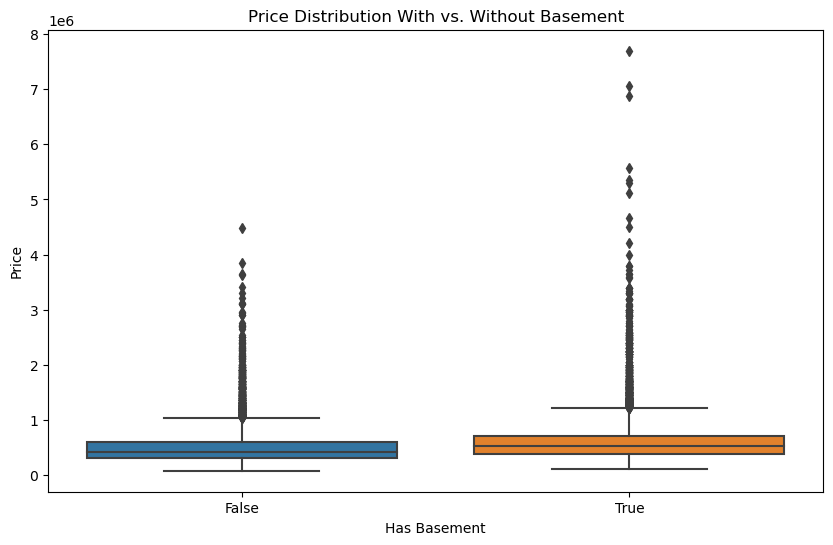

In [15]:
# Susie - Test if the mean price of houses with a basement is significantly different from those without a basement
from scipy.stats import ttest_ind

# Split data based on houses with/without basement
with_basement = data[data['sqft_basement'] > 0]
without_basement = data[data['sqft_basement'] == 0]

# Performing a t-test
t_stat, p_val = ttest_ind(with_basement['price'], without_basement['price'])

print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='sqft_basement', y='price', data=data.assign(sqft_basement=data['sqft_basement']>0))
plt.title('Price Distribution With vs. Without Basement')
plt.xlabel('Has Basement')
plt.ylabel('Price')
plt.show()


#### Zipcode Analysis

As realtors often like to say, housing is all about location, location, location. And with the data we have on zipcodes we can see if this is really true. We can also scrape data externally to see what confounders, if any predict why a zip code may have more or less expensive houses (average income in a zip code, certain zipcodes being near the waterfront, etc.)

Most expensive vs. least expensive zipcodes

In [16]:

zipcode_df = data.groupby('zipcode').agg(
    avg_price=('price', 'mean'),
    avg_price_per_sqft=('price_per_sqft_living', 'mean'),
    avg_sqft_living = ('sqft_living', 'mean'),
    avg_sqft_lot = ('sqft_lot', 'mean'),
    avg_age = ('house_age','mean'),
    total_houses=('zipcode', 'size')
).reset_index()
zipcode_df

,zipcode,avg_price,avg_price_per_sqft,avg_sqft_living,avg_sqft_lot,avg_age,total_houses
0,98001,2.808047e+05,151.387938,1900.856354,14937.450276,33.643646,362
1,98002,2.342840e+05,151.174091,1627.743719,7517.633166,46.562814,199
2,98003,2.941113e+05,157.113414,1928.882143,10603.096429,37.457143,280
3,98004,1.355927e+06,475.435611,2909.022082,13104.220820,42.867508,317
4,98005,8.101649e+05,314.929231,2656.803571,19928.785714,44.553571,168
...,...,...,...,...,...,...,...
65,98177,6.761854e+05,292.918745,2323.333333,11904.403922,53.447059,255
66,98178,3.106486e+05,189.202933,1729.351145,8309.122137,59.061069,262
67,98188,2.890783e+05,169.007306,1802.772059,10126.080882,48.882353,136
68,98198,3.028789e+05,178.428610,1745.360714,10525.978571,47.614286,280


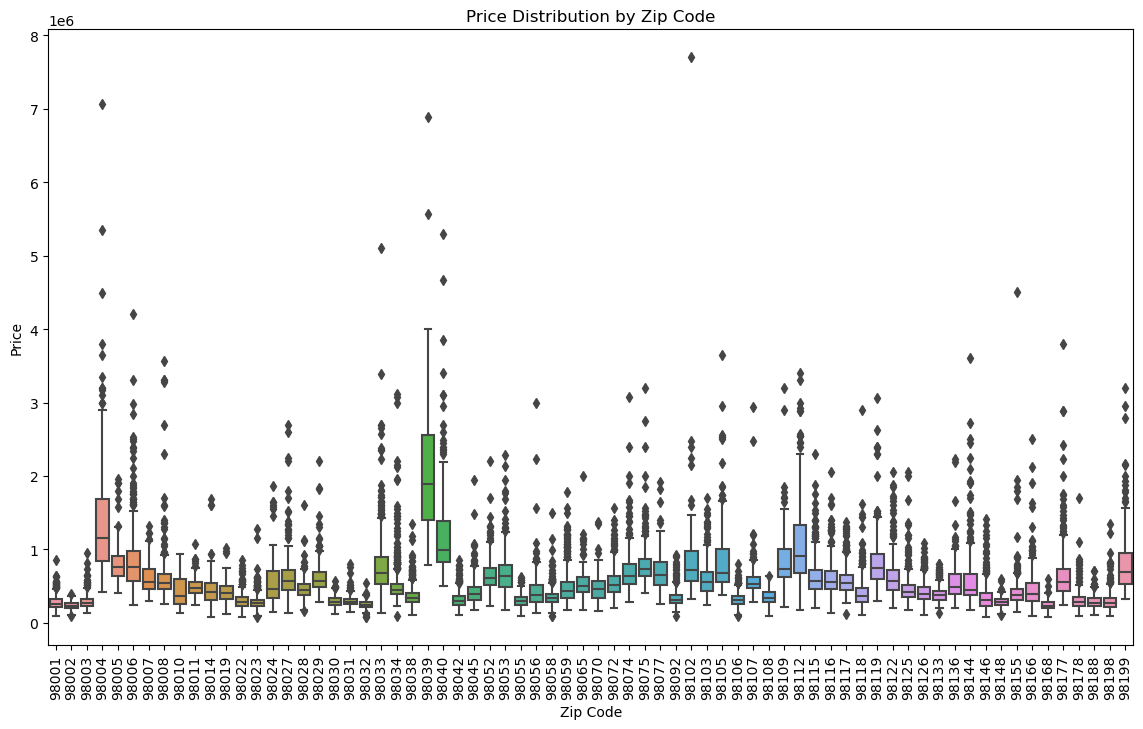

In [17]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='zipcode', y='price', data=data)
plt.xticks(rotation=90)
plt.title('Price Distribution by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Price')
plt.show()

Let's see if there are any other variables we can check that may be spatially similar and may be confounding our analysis of the price in different zip codes, for example Average house age per zipcode.

In [18]:
zipcode_df["house_age"] = data.groupby("zipcode").apply(lambda x: x["house_age"].mean()).sort_values(ascending=False)
zipcode_df.corr(method="pearson")

,zipcode,avg_price,avg_price_per_sqft,avg_sqft_living,avg_sqft_lot,avg_age,total_houses,house_age
zipcode,1.000000,-0.097518,0.151576,-0.408197,-0.348230,0.622144,0.024878,NaN
avg_price,-0.097518,1.000000,0.865891,0.765753,-0.077480,0.112726,-0.150655,NaN
avg_price_per_sqft,0.151576,0.865891,1.000000,0.397018,-0.214734,0.471106,-0.078179,NaN
avg_sqft_living,-0.408197,0.765753,0.397018,1.000000,0.186817,-0.461699,-0.092070,NaN
avg_sqft_lot,-0.348230,-0.077480,-0.214734,0.186817,1.000000,-0.364846,-0.323261,NaN
avg_age,0.622144,0.112726,0.471106,-0.461699,-0.364846,1.000000,-0.145524,NaN
total_houses,0.024878,-0.150655,-0.078179,-0.092070,-0.323261,-0.145524,1.000000,NaN
house_age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


However there doesn't appear to be any correlation between the average price per square foot and the age of house, which means it's not really relevant to our end analysis

However Zip codes are still a pretty good way of correlating our listings to other data of interest (employment, annual income, education, modes of transportation). We can use another data source to get this information and compare it to our existing data. https://www.uszipcodes.com has information for each zip code in an easy to parse format, so we can just scrape it for each zip code of interest.

This might be interesting: https://www.unitedstateszipcodes.org/98039/
We can scrape information off this for each zip code (only 70 so should be pretty easy) and do some cool stuff like look at preferred transportation, school enrollment or median salary

In [19]:
data["zipcode"].unique()

array([98027, 98117, 98029, 98065, 98006, 98106, 98011, 98052, 98133,
       98102, 98001, 98092, 98125, 98059, 98199, 98115, 98107, 98024,
       98155, 98072, 98042, 98116, 98034, 98119, 98077, 98045, 98105,
       98007, 98074, 98166, 98008, 98198, 98003, 98014, 98136, 98023,
       98033, 98038, 98103, 98055, 98075, 98058, 98122, 98053, 98118,
       98112, 98004, 98177, 98019, 98144, 98056, 98005, 98168, 98146,
       98028, 98108, 98040, 98148, 98010, 98030, 98178, 98032, 98109,
       98126, 98031, 98070, 98022, 98188, 98002, 98039])

In [20]:
#data scraping

from bs4 import BeautifulSoup
import csv
import pandas as pd
import requests
import re

#needed to avoid 403 when scraping
headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Encoding': 'gzip, deflate, br, zstd',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'no-cache',
    'Content-Type': 'application/x-www-form-urlencoded',
    'Cookie': '_pk_id.29.e1c2=968bcc07b503e521.1718492157.; _li_dcdm_c=.unitedstateszipcodes.org; _lc2_fpi=16307b161960--01j0f1tnk55mz01jmc7j0n6f4e; _lc2_fpi_meta=%7B%22w%22%3A1718492157541%7D; cookie=648b908f-3427-4565-9b77-6d7d2cf00ee6; cookie_cst=zix7LPQsHA%3D%3D; _lr_env_src_ats=false; pbjs_fabrickId=%7B%22fabrickId%22%3A%22E1%3ABYenz68hhbaBPFJ1Oj_JfqhZdleyyEAv3MXzzDpE6CReGlkktJA3lH3MDFyhym_EWoRqQxCPIQwjZRGnabsXQNLHY1PUkXC4K3eblBLxttU%22%7D; pbjs_fabrickId_cst=zix7LPQsHA%3D%3D; ccuid=2d625ca7-9c69-4080-9aba-7609f84a642d; _au_1d=AU1D-0100-001718492158-GDMN4A82-A886; __qca=P0-2052112755-1718492157874; _gid=GA1.2.1291931010.1718492158; TAPAD=%7B%22id%22%3A%2240eada16-938c-4448-beaf-90cf62ce46dc%22%7D; _ga_FVWZ0RM4DH=GS1.1.1718554833.3.0.1718554833.60.0.0; _pk_ref.29.e1c2=%5B%22%22%2C%22%22%2C1718554834%2C%22https%3A%2F%2Fwww.google.com%2F%22%5D; _pk_ses.29.e1c2=1; _lr_retry_request=true; cto_bidid=cnESVV9RNkZPRFp3RDglMkJtbHk4bGFuVzZUQndic0l2ckNWciUyRk1iMWhIJTJCbHBoMUdyUDdLJTJGeXY4SW9OOTAxMmh3c2FxMWNUa2pad1lFRmhWc2RmT1Z1RTh4UXU0RDRkZ1Z3bkV0TXVTNGx3MkY4MEpIRktqYVZkaWxodVhUWThDTFRjMlZU; cto_bundle=7ktvOV9MciUyRmd1UGRPYm51bEolMkJIakxuT3VyYlZEdEFQR25WYktXc0s5ZUZxTGIlMkZnQ3llYmRIRTglMkYlMkJKVGpBMTFnMSUyRmdBekk0elp6ellUVzYzUUZzMkRIZnZ0a29GM09xanNrVGgxZnk2R3BqSjZQRSUyRmZ2NUp4d1UlMkJqME81Zzl4RHRyVHpjbThZNWh1RTNCciUyQkp0d2x0cFRnWk51WVkxc1RMemthckpucXBDaUxEUnclM0Q; _ga=GA1.2.1875332805.1718492158; __gads=ID=c3827d46571af6b6:T=1718492159:RT=1718554835:S=ALNI_MbF3JKPcwhXpg35XAKEgxes68-f9A; __gpi=UID=00000e2b1626d22d:T=1718492159:RT=1718554835:S=ALNI_MaaESawrsYVZVFcWJE30dFjsbQ2sg; __eoi=ID=7a68658352ef795b:T=1718492159:RT=1718554835:S=AA-AfjYDklsM5NxCrHNXmNd2hVS4; datadome=J~WQOWI5swjXmp~QZmI5Uf0JqgJNeb5sYpoyJyUEJYQBXs1_pYjlIB8S7jCfSUbJaCVNudVVr5IR1m9ThUYrZVduJ7ec1j7GjLWjz6R~qAwK0~zr2Lz1g0gQWk0RnYCX',
    'Origin': 'https://www.unitedstateszipcodes.org',
    'Pragma': 'no-cache',
    'Priority': 'u=0,i',
    'Referer': "https://www.unitedstateszipcodes.org/",
    'Sec-Ch-Ua': '"Google Chrome";v="125", "Chromium";v="125", "Not.A/Brand";v="24"',
    'Sec-Ch-Ua-Mobile': "?0",
    'Sec-Ch-Ua-Platform': '"Windows"',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-User': '?1',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36"
}

#much of the data is in tables;
#tags_of_interest contains the labeled data we care about
#when the tuple has two elements the first is the tag and the second is the label
#when the tuple has three elements, the third is the key for the dictionary
tags_of_interest = [("th", "Population"), ("th", "Population Density"), ("th", "Housing Units"), ("th", "Median Home Value"), ("th", "Land Area"), ("th", "Water Area"), ("th", "Occupied Housing Units"), ("th", "Median Household Income"),
                    ("td", "Median Age: ", "Median Age"), ("td", "Male Median Age: ", "Male Median Age"), ("td", "Female Median Age: ", "Female Median Age"), ("th", 'Male', "Male Population"), ("th", "Female", "Female Population"), ("th", "White", "White Population"), ("th", "Black", "Black or African American Population"), ("th", "American Indian", "American Indian or Alaskan Native Population"), ("th", "Asian", "Asian Population"), ("th", "Hawaiian", "Native Hawaiian and Other Pacific Islander Population"), ("th", "Other Race", "Other Race Population"), ("th", "Two Or More Races", "Two or More Races Population"), ("th", "Husband Wife", "Husband and Wife Family Households"), ("th", "Single Guardian", "Single Guardian Households"), ("th", "Singles", "Singles Households"), ("th", "Singles With Roommate", "Singles with Roommate Households"), ("th", "Households without Kids"), ("th", "Households with Kids"), ("th", "In Occupied Housing Units"), ("th", "Correctional Facility", "Correctional Facilities"), ("th", "Juvenile Facilities"), ("th", "Nursing Facilities"), ("th", "Other Institutional"), ("th", "College Student Housing"), ("th", "Military Quarters"), ("th", "Other Noninstitutional"), ("th", "Owned Households With A Mortgage", "Owned House with Mortgage"), ("th", "Owned Households Free", "Owned House Entirely"), ("th", "Renter Occupied Households", "House Occupied by Renter"), ("th", "Households Vacant"), ("th", "Studio Apartment", "Rented Studio Apartment"), ("th", "1 Bedroom", "Rented 1 Bedroom"), ("th", "2 Bedroom", "Rented 2 Bedroom"), ("th", "3+ Bedroom", "Rented 3+ Bedroom"), ("th", "Worked Full-time"), ("th", "Worked Part-time"), ("th", "No Earnings"), ("th", "Car, truck, or van", "Commute in Car, Truck, or Van"), ("th", "Public transportation", "Commute in Public Transportation"), ("th", "Taxicab", "Commute in Taxicab"), ("th", "Motorcycle", "Commute in Motorcycle"), ("th", "Bicycle", "Commute in Bicycle, Walking, Other"), ("th", "Worked at Home"), ("th", "Less than High School Diploma"), ("th", "High School Graduate"), ("th", "Associate's degree"), ("th", "Master's degree"), ("th", "Professional school degree"), ("th", "Doctorate degree"), ("th", "Enrolled in Public School"), ("th", "Enrolled in Private School"), ("th", "Not Enrolled in School")]

#get_sibling_after gets the value of the sibling after the tag with label
def get_sibling_after(soup, tag, label):
    #find_contains returns true if tag.text contains label
    def find_contains(value):
        return value.name == tag and label in value.text.replace('\xa0', '')
    return soup.find(find_contains).find_next_sibling().text



zipcodes = [98027, 98117, 98029, 98065, 98006, 98106, 98011, 98052, 98133,
       98102, 98001, 98092, 98125, 98059, 98199, 98115, 98107, 98024,
       98155, 98072, 98042, 98116, 98034, 98119, 98077, 98045, 98105,
       98007, 98074, 98166, 98008, 98198, 98003, 98014, 98136, 98023,
       98033, 98038, 98103, 98055, 98075, 98058, 98122, 98053, 98118,
       98112, 98004, 98177, 98019, 98144, 98056, 98005, 98168, 98146,
       98028, 98108, 98040, 98148, 98010, 98030, 98178, 98032, 98109,
       98126, 98031, 98070, 98022, 98188, 98002, 98039]

zipcode_data = []
for zipcode in zipcodes:
    url = f"https://www.unitedstateszipcodes.org/{zipcode}/"
    print(f"Now scraping: {zipcode}\nURL: {url}\n")
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")
    zdata = {"zipcode": zipcode}
    for tag in tags_of_interest:
        key = tag[2] if len(tag) == 3 else tag[1]
        zdata[key] = get_sibling_after(soup, tag[0], tag[1])
    zipcode_data.append(zdata)


#print(zipcode_data)


scraped_df = pd.DataFrame(zipcode_data).set_index('zipcode')
print(scraped_df.head())
scraped_df.to_csv("zipcode_data.csv")

Now scraping: 98027
URL: https://www.unitedstateszipcodes.org/98027/

Now scraping: 98117
URL: https://www.unitedstateszipcodes.org/98117/

Now scraping: 98029
URL: https://www.unitedstateszipcodes.org/98029/

Now scraping: 98065
URL: https://www.unitedstateszipcodes.org/98065/

Now scraping: 98006
URL: https://www.unitedstateszipcodes.org/98006/

Now scraping: 98106
URL: https://www.unitedstateszipcodes.org/98106/

Now scraping: 98011
URL: https://www.unitedstateszipcodes.org/98011/

Now scraping: 98052
URL: https://www.unitedstateszipcodes.org/98052/

Now scraping: 98133
URL: https://www.unitedstateszipcodes.org/98133/

Now scraping: 98102
URL: https://www.unitedstateszipcodes.org/98102/

Now scraping: 98001
URL: https://www.unitedstateszipcodes.org/98001/

Now scraping: 98092
URL: https://www.unitedstateszipcodes.org/98092/

Now scraping: 98125
URL: https://www.unitedstateszipcodes.org/98125/

Now scraping: 98059
URL: https://www.unitedstateszipcodes.org/98059/

Now scraping: 98199


Once we've scraped the data we'll save it

In [21]:

#comment out if csv doesn't exist yet
scraped_df = pd.read_csv('zipcode_data.csv')


scraped_zipcode_df = pd.merge(zipcode_df, scraped_df, on = 'zipcode', how='left').reset_index()
scraped_zipcode_df.head()

,index,zipcode,avg_price,avg_price_per_sqft,avg_sqft_living,avg_sqft_lot,avg_age,total_houses,house_age,Population,...,Worked at Home,Less than High School Diploma,High School Graduate,Associate's degree,Master's degree,Professional school degree,Doctorate degree,Enrolled in Public School,Enrolled in Private School,Not Enrolled in School
0,0,98001,2.808047e+05,151.387938,1900.856354,14937.450276,33.643646,362,NaN,"31,911",...,579,"1,957","12,586","3,015",942,152,72,"5,979",470,800
1,1,98002,2.342840e+05,151.174091,1627.743719,7517.633166,46.562814,199,NaN,"31,647",...,361,"3,924","13,231","1,922",587,149,20,"5,325",243,"1,112"
2,2,98003,2.941113e+05,157.113414,1928.882143,10603.096429,37.457143,280,NaN,"44,151",...,944,"3,570","15,997","3,049","1,212",296,156,"6,956",601,"1,446"
3,3,98004,1.355927e+06,475.435611,2909.022082,13104.220820,42.867508,317,NaN,"27,946",...,"1,454",653,"5,275","1,384","4,170","1,253",715,"2,904","1,385",462
4,4,98005,8.101649e+05,314.929231,2656.803571,19928.785714,44.553571,168,NaN,"17,714",...,524,454,"2,954",875,"2,368",500,412,"2,148",566,185


Now we can create maps showing how each of these features from the original dataset and the ones we've scraped vary by zipcode, we do this through the use of folium and geopy. after obtaining the washington zipcodes geojson from OpenDataDE (https://github.com/OpenDataDE/State-zip-code-GeoJSON) we can use folium to plot these values by zipcodes as choropleth maps that we will save as html files

In [22]:
zipcodes_geojson = 'washington_zipcodes.geojson'
gdf = gpd.read_file(zipcodes_geojson)


import folium

gdf.to_csv('gdf.csv')

scraped_zipcode_df['Population'] = scraped_zipcode_df['Population'].str.replace(',', '').astype(int)
for column in scraped_zipcode_df.columns:
    if scraped_zipcode_df[column].dtype != 'object':
        scraped_zipcode_df[column].fillna(scraped_zipcode_df[column].mean(),inplace=True)
scraped_zipcode_df = scraped_zipcode_df.apply(pd.to_numeric, errors='coerce')
scraped_zipcode_df.dropna(axis=1, inplace=True)

html_files = []
for column in scraped_zipcode_df.columns:
    if (column != 'zipcode' and column != 'index'):
        print(column)
        column_map = folium.Map(location=[47.6061, -122.3328], zoom_start=10)
        folium.Choropleth(
            geo_data=gdf,
            name=f'choropleth_{column}',
            data=scraped_zipcode_df,
            columns=['zipcode', column],
            key_on='feature.properties.ZCTA5CE10',
            fill_color='YlOrRd',
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name=f'{column}'
        ).add_to(column_map)

        file_name = f'choropleth_{column}.html'
        html_files.append(file_name)
        column_map.save(file_name)
        print(f'Saved {file_name}')
        column_map

avg_price
Saved choropleth_avg_price.html
avg_price_per_sqft
Saved choropleth_avg_price_per_sqft.html
avg_sqft_living
Saved choropleth_avg_sqft_living.html
avg_sqft_lot
Saved choropleth_avg_sqft_lot.html
avg_age
Saved choropleth_avg_age.html
total_houses
Saved choropleth_total_houses.html
Population
Saved choropleth_Population.html
Land Area
Saved choropleth_Land Area.html
Water Area
Saved choropleth_Water Area.html
Median Age
Saved choropleth_Median Age.html
Male Median Age
Saved choropleth_Male Median Age.html
Female Median Age
Saved choropleth_Female Median Age.html
Correctional Facilities
Saved choropleth_Correctional Facilities.html
Juvenile Facilities
Saved choropleth_Juvenile Facilities.html
Nursing Facilities
Saved choropleth_Nursing Facilities.html
Other Institutional
Saved choropleth_Other Institutional.html
Military Quarters
Saved choropleth_Military Quarters.html
Other Noninstitutional
Saved choropleth_Other Noninstitutional.html
Commute in Taxicab
Saved choropleth_Commute 

We can display these html files in the colab, however you may have trouble viewing them as a submission, so it may be easier to simply open the saved html file created by this script saved in the folder of this project

In [23]:
from IPython.display import IFrame

for html_file in html_files:
    print(html_file)
    display(IFrame(html_file, width=700, height=500))

choropleth_avg_price.html


choropleth_avg_price_per_sqft.html


choropleth_avg_sqft_living.html


choropleth_avg_sqft_lot.html


choropleth_avg_age.html


choropleth_total_houses.html


choropleth_Population.html


choropleth_Land Area.html


choropleth_Water Area.html


choropleth_Median Age.html


choropleth_Male Median Age.html


choropleth_Female Median Age.html


choropleth_Correctional Facilities.html


choropleth_Juvenile Facilities.html


choropleth_Nursing Facilities.html


choropleth_Other Institutional.html


choropleth_Military Quarters.html


choropleth_Other Noninstitutional.html


choropleth_Commute in Taxicab.html


choropleth_Commute in Motorcycle.html


Using our zipcode dataframe, we will perform ANOVA to see if there is a significant difference between zipcodes on average house price and price per square foot. Later, when we need to prune the dataset for relevant features we'll be able to cross reference this against the correlation table and our scraped data to see which features of zipcodes most affect housing prices and prices per square foot

In [24]:
groups = [group['price'].values for name, group in data.groupby('zipcode')]
f_statistic, p_value = stats.f_oneway(*groups)
print(f"F-statistic: {f_statistic}, p-value: {p_value}")

F-statistic: 214.6322029409192, p-value: 0.0


In [25]:
groups = [group['price_per_sqft_living'].values for name, group in data.groupby('zipcode')]
f_statistic, p_value = stats.f_oneway(*groups)
print(f"F-statistic: {f_statistic}, p-value: {p_value}")

F-statistic: 385.57121676127895, p-value: 0.0


As can be seen the variance between zipcodes is extremely high, we can now perform post hoc testing using tukey's HSD

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data_flat = np.concatenate(groups)
labels = []
for i, group in enumerate(groups):
    labels.extend([f"Group{i+1}"] * len(group))
tukey_results = pairwise_tukeyhsd(data_flat, labels)
print(tukey_results)

/home/mihir/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower     upper   reject
-----------------------------------------------------------
 Group1 Group10   74.5993    0.0   47.4408  101.7578   True
 Group1 Group11   71.6966    0.0   39.8838  103.5094   True
 Group1 Group12   51.6138    0.0   24.2241   79.0035   True
 Group1 Group13   30.4185 0.0018    4.7731   56.0639   True
 Group1 Group14   -2.4681    1.0  -23.5761   18.6398  False
 Group1 Group15  103.8457    0.0   66.2659  141.4255   True
 Group1 Group16  100.1844    0.0   78.1593  122.2094   True
 Group1 Group17   73.7551    0.0   49.4957   98.0146   True
 Group1 Group18  120.6829    0.0   97.2432  144.1227   True
 Group1 Group19    3.7683    1.0  -21.1989   28.7354  False
 Group1  Group2   -0.2138    1.0  -27.1943   26.7666  False
 Group1 Group20    9.6525    1.0  -14.8296   34.1345  False
 Group1 Group21    2.8316    1.0  -28.8863   34.5495  False
 Group1 Group22  191.7745    0.0  169.98

As we can see there's significant variance between zipcodes, and having a look at the different heatmaps we can see that there's a variety of correlations between more expensive and less expensive zipcodes and other factors. For example there are the obvious ones such as median household income being correlated directly with avg home price in a zipcode but there are also less obvious ones such as more expensive zipcodes (in terms of price per sqft) having higher median ages.

Avg Price per sqft
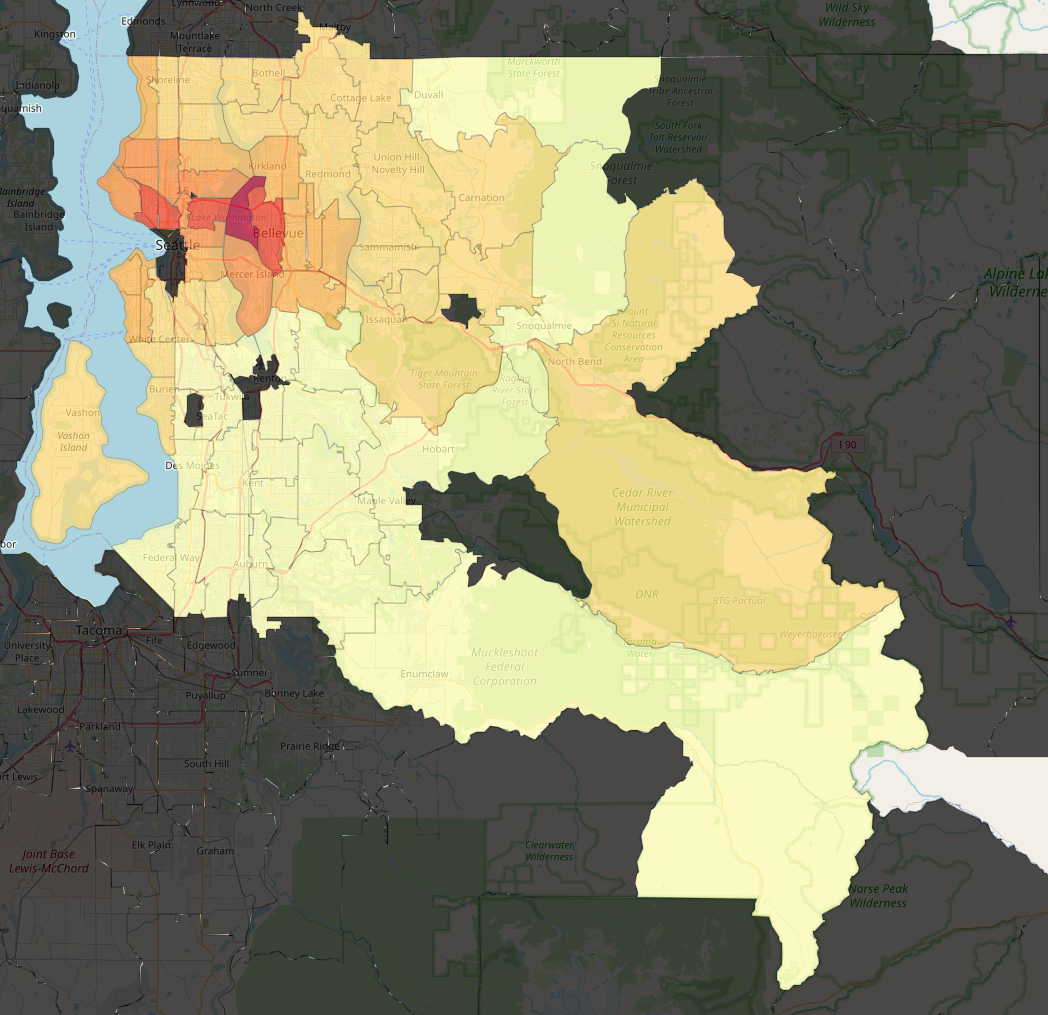

Median Age
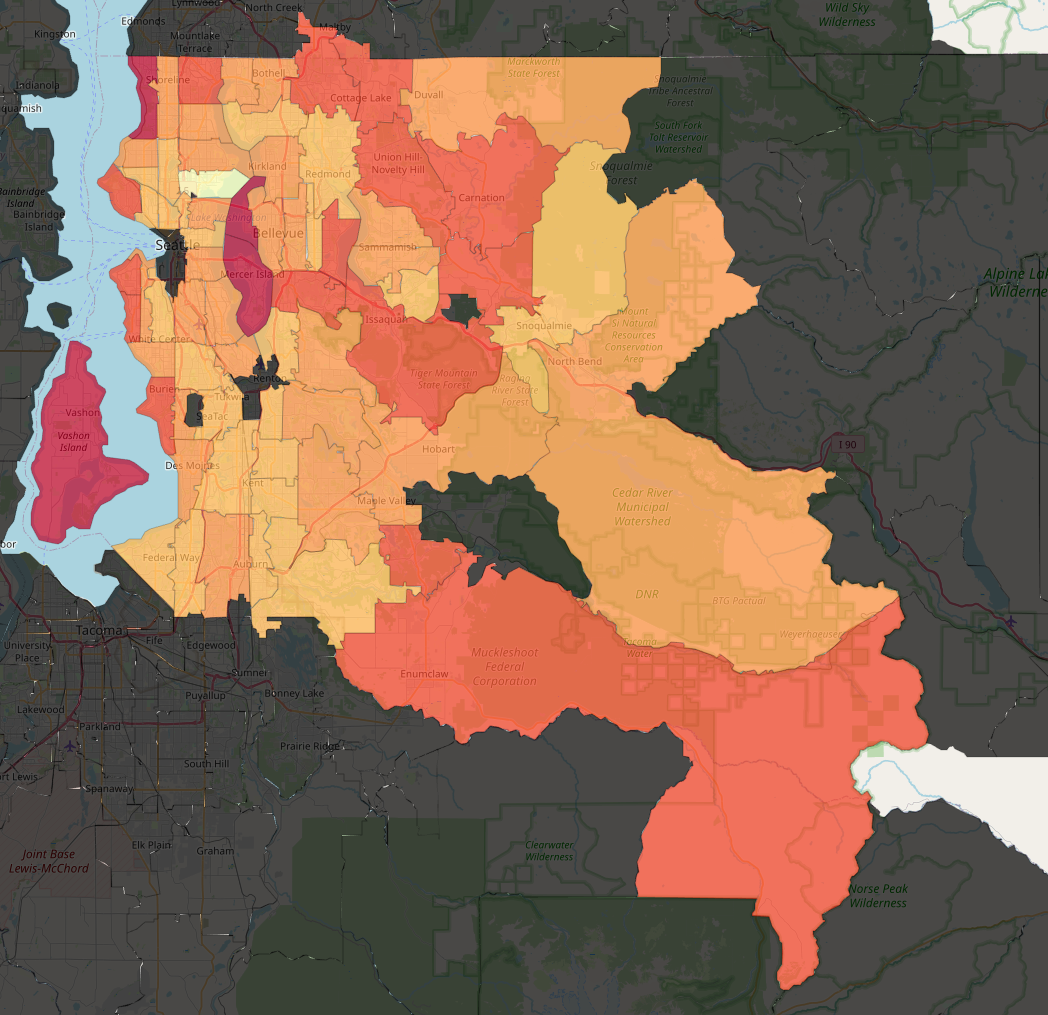

There are many more conclusions we can draw from this analysis, however suffice to say that we can confidently reject the null hypothesis and conclude that zipcodes significantly predict house price as a complex function of various other confounding variables that are also tied to zipcode


### Seasonality Analysis

Next we can see whether the timing of the listing has any effect on the price, we can hypothesize that as the housing market changes this will affect the number, quality and price of the listings that are put up.

In [27]:
data.insert(2, 'Season', "")
def seasonCalc(x):
  winter = [12, 1, 2]
  spring = [3, 4, 5]
  summer = [6, 7, 8]
  fall = [9, 10, 11]
  month = x.month
  if(month in winter):
    return "Winter"
  if(month in spring):
    return "Spring"
  if(month in summer):
    return "Summer"
  if(month in fall):
    return "Fall"

data['Season'] = data['date'].apply(lambda x: seasonCalc(x))
print(data['Season'].value_counts())


Season
Spring    6520
Summer    6331
Fall      5063
Winter    3699
Name: count, dtype: int64


We will perform a Chi-Square Goodness of Fit Analysis on distribution of House Sales for the various seasons.

We must make sure that all requirements to perform the GoF test are met:

1) As we are looking at number sales in each season we have a single categorical variable.

2) As one house sale doesn't impact another house sale we have independence of observations.

3) The data is mutually exclusive since a house can only be sold in a single season.

4) There are atleast 5 house sales in each season.

- $H_{0}$: The distribution of house sales across the 4 seasons is not uniformly distributed.

- $H_{A}$: The distribution of house sales across the 4 seasons is not uniformly distributed.

In [28]:
observed_data = data['Season'].value_counts()
expected_data = pd.Series([len(data['Season'])/4] * 4)
_ , p_val = stats.chisquare(observed_data, expected_data)
print(p_val)

2.004746007881965e-205


As p is less than the alpha value of 0.05, we proceed to reject the Null Hypothesis. This means that the distribution of house sales across the 4 seasons is not uniformly distributed.

However, Looking at the data over time there appears to be uniformity indicating no substantial change in price over time.

Based on this visualization we see that the price data is relatively uniform with the price per square foot being between USD 500 and USD 800. This could potentialy be attributed due to some houses having better location and amenities in turn increasing the valuation.

Text(0, 0.5, 'Price ($ Millions of USD)')

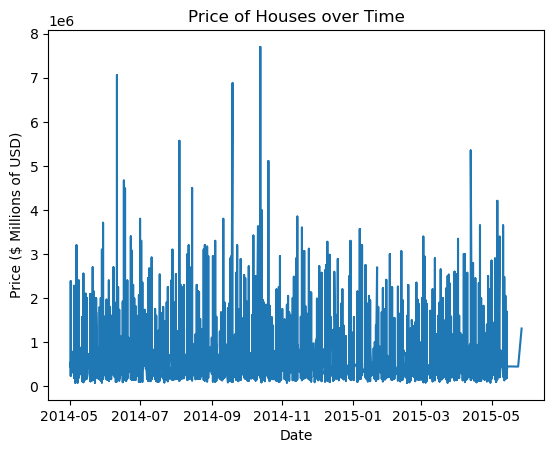

In [29]:
plt.plot(data['date'], data['price'])
plt.title('Price of Houses over Time')
plt.xlabel('Date')
plt.ylabel('Price ($ Millions of USD)')

This data suggests that most houses are priced between USD 500,000 and USD 1,500,000 with the ocassional outlier of a USD 3,000,000+ house.

# ML Analysis

Now that we know what columns are relevant to predicting price we can see how an ML model performs using all the data available vs only the columns that we have determined are relevant through testing

In [37]:
#Using complete original data
from sklearn.model_selection import train_test_split
Y = data['price']
X = data.drop(['id', 'date', 'price', 'price_per_sqft_living', 'price_per_sqft_lot'], axis=1)
random_state = 42

#As we can't take date we will instead one hot encode the seasons
X['Summer'] = X['Season'].apply(lambda x: 1 if x == 'Summer' else 0)
X['Fall'] = X['Season'].apply(lambda x: 1 if x == 'Fall' else 0)
X['Winter'] = X['Season'].apply(lambda x: 1 if x == 'Winter' else 0)
X['Spring'] = X['Season'].apply(lambda x: 1 if x == 'Spring' else 0)

X = X.drop(['Season'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = random_state, shuffle = True)

print(X_train.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'house_age', 'years_since_renovation',
       'num_rooms', 'living percentage', 'Summer', 'Fall', 'Winter', 'Spring'],
      dtype='object')


Epoch [10/10000], Loss: 433123917824.0000
Epoch [20/10000], Loss: 433086398464.0000
Epoch [30/10000], Loss: 432900997120.0000
Epoch [40/10000], Loss: 432219324416.0000
Epoch [50/10000], Loss: 430147371008.0000
Epoch [60/10000], Loss: 424738095104.0000
Epoch [70/10000], Loss: 412279668736.0000
Epoch [80/10000], Loss: 386660925440.0000
Epoch [90/10000], Loss: 339749470208.0000
Epoch [100/10000], Loss: 265112322048.0000
Epoch [110/10000], Loss: 169517957120.0000
Epoch [120/10000], Loss: 91106967552.0000
Epoch [130/10000], Loss: 72370700288.0000
Epoch [140/10000], Loss: 65880739840.0000
Epoch [150/10000], Loss: 58765479936.0000
Epoch [160/10000], Loss: 55995146240.0000
Epoch [170/10000], Loss: 53035900928.0000
Epoch [180/10000], Loss: 50626605056.0000
Epoch [190/10000], Loss: 48462565376.0000
Epoch [200/10000], Loss: 46523518976.0000
Epoch [210/10000], Loss: 44782870528.0000
Epoch [220/10000], Loss: 43214204928.0000
Epoch [230/10000], Loss: 41808957440.0000
Epoch [240/10000], Loss: 4055319

Epoch [2020/10000], Loss: 20994107392.0000
Epoch [2030/10000], Loss: 20893739008.0000
Epoch [2040/10000], Loss: 20791101440.0000
Epoch [2050/10000], Loss: 20684789760.0000
Epoch [2060/10000], Loss: 20574599168.0000
Epoch [2070/10000], Loss: 20461643776.0000
Epoch [2080/10000], Loss: 20345655296.0000
Epoch [2090/10000], Loss: 20226410496.0000
Epoch [2100/10000], Loss: 20103139328.0000
Epoch [2110/10000], Loss: 19976273920.0000
Epoch [2120/10000], Loss: 19846488064.0000
Epoch [2130/10000], Loss: 19714979840.0000
Epoch [2140/10000], Loss: 19581093888.0000
Epoch [2150/10000], Loss: 19445839872.0000
Epoch [2160/10000], Loss: 19308279808.0000
Epoch [2170/10000], Loss: 19166873600.0000
Epoch [2180/10000], Loss: 19021690880.0000
Epoch [2190/10000], Loss: 18875041792.0000
Epoch [2200/10000], Loss: 18729256960.0000
Epoch [2210/10000], Loss: 18582267904.0000
Epoch [2220/10000], Loss: 18433560576.0000
Epoch [2230/10000], Loss: 18285217792.0000
Epoch [2240/10000], Loss: 18136616960.0000
Epoch [2250

Epoch [4010/10000], Loss: 3951496704.0000
Epoch [4020/10000], Loss: 3928729600.0000
Epoch [4030/10000], Loss: 3911944448.0000
Epoch [4040/10000], Loss: 3898537984.0000
Epoch [4050/10000], Loss: 3877900288.0000
Epoch [4060/10000], Loss: 3867506688.0000
Epoch [4070/10000], Loss: 3854564352.0000
Epoch [4080/10000], Loss: 3833911808.0000
Epoch [4090/10000], Loss: 3827783424.0000
Epoch [4100/10000], Loss: 3806002944.0000
Epoch [4110/10000], Loss: 3815466752.0000
Epoch [4120/10000], Loss: 3791600640.0000
Epoch [4130/10000], Loss: 3769274368.0000
Epoch [4140/10000], Loss: 3754488320.0000
Epoch [4150/10000], Loss: 3745528064.0000
Epoch [4160/10000], Loss: 3730535680.0000
Epoch [4170/10000], Loss: 3724446208.0000
Epoch [4180/10000], Loss: 3711760640.0000
Epoch [4190/10000], Loss: 3693253120.0000
Epoch [4200/10000], Loss: 3677035264.0000
Epoch [4210/10000], Loss: 3682590976.0000
Epoch [4220/10000], Loss: 3652941824.0000
Epoch [4230/10000], Loss: 3643554816.0000
Epoch [4240/10000], Loss: 36278981

Epoch [6020/10000], Loss: 2475218944.0000
Epoch [6030/10000], Loss: 2477799424.0000
Epoch [6040/10000], Loss: 2471250432.0000
Epoch [6050/10000], Loss: 2462772736.0000
Epoch [6060/10000], Loss: 2462651648.0000
Epoch [6070/10000], Loss: 2462771712.0000
Epoch [6080/10000], Loss: 2461954560.0000
Epoch [6090/10000], Loss: 2448605440.0000
Epoch [6100/10000], Loss: 2453399552.0000
Epoch [6110/10000], Loss: 2445027328.0000
Epoch [6120/10000], Loss: 2474389504.0000
Epoch [6130/10000], Loss: 2447848448.0000
Epoch [6140/10000], Loss: 2435211008.0000
Epoch [6150/10000], Loss: 2435099136.0000
Epoch [6160/10000], Loss: 2421842176.0000
Epoch [6170/10000], Loss: 2424975104.0000
Epoch [6180/10000], Loss: 2419620608.0000
Epoch [6190/10000], Loss: 2418585856.0000
Epoch [6200/10000], Loss: 2413898752.0000
Epoch [6210/10000], Loss: 2411735040.0000
Epoch [6220/10000], Loss: 2413238784.0000
Epoch [6230/10000], Loss: 2400744960.0000
Epoch [6240/10000], Loss: 2411193856.0000
Epoch [6250/10000], Loss: 23888151

Epoch [8010/10000], Loss: 1974881536.0000
Epoch [8020/10000], Loss: 1961249408.0000
Epoch [8030/10000], Loss: 1965836032.0000
Epoch [8040/10000], Loss: 1961008000.0000
Epoch [8050/10000], Loss: 1962919680.0000
Epoch [8060/10000], Loss: 1956431616.0000
Epoch [8070/10000], Loss: 1959559168.0000
Epoch [8080/10000], Loss: 1965271808.0000
Epoch [8090/10000], Loss: 1966480384.0000
Epoch [8100/10000], Loss: 1952707200.0000
Epoch [8110/10000], Loss: 1942926208.0000
Epoch [8120/10000], Loss: 1958801024.0000
Epoch [8130/10000], Loss: 1947213184.0000
Epoch [8140/10000], Loss: 1946152064.0000
Epoch [8150/10000], Loss: 1947266816.0000
Epoch [8160/10000], Loss: 1932903552.0000
Epoch [8170/10000], Loss: 1947252352.0000
Epoch [8180/10000], Loss: 1948906496.0000
Epoch [8190/10000], Loss: 1935009408.0000
Epoch [8200/10000], Loss: 1928837888.0000
Epoch [8210/10000], Loss: 1926797824.0000
Epoch [8220/10000], Loss: 1933050880.0000
Epoch [8230/10000], Loss: 1941895680.0000
Epoch [8240/10000], Loss: 19337916

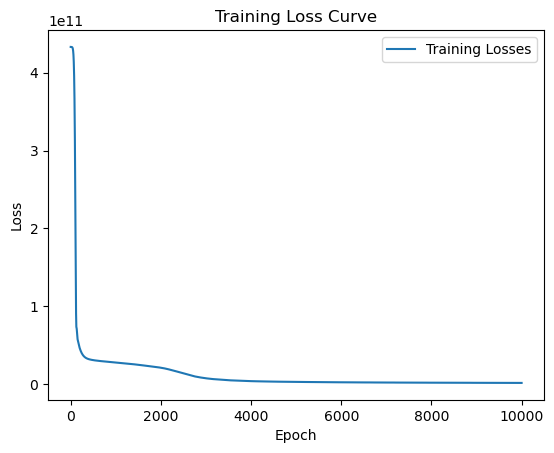

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import time

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

#Converting to numpy arrays
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

#Normalizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Converting to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
Y_train = torch.tensor(Y_train, dtype=torch.float32).view(-1, 1).to(device)
Y_test = torch.tensor(Y_test, dtype=torch.float32).view(-1, 1).to(device)

start_time = time.time()

class HousePricePredictor(nn.Module):
    def __init__(self, input_size):
        super(HousePricePredictor, self).__init__()
        self.fc0 = nn.Linear(input_size, 512)
        self.fc1 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        
        
    def forward(self, x):
        x = torch.relu(self.fc0(x))
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

input_size = X_train.shape[1]
model = HousePricePredictor(input_size).to(device)

#training loop
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_losses = []
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

#Evaluating the model
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, Y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

plt.plot(range(num_epochs), train_losses, label='Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

In [39]:
#Trimming it down to what we know is relevant
Y = data['price']
X = data.drop(['id', 'date', 'price','condition', 'yr_built', 'yr_renovated', 'lat', 'long','house_age','living percentage','price_per_sqft_living', 'price_per_sqft_lot', 'years_since_renovation', 'sqft_living15', 'sqft_lot15', 'sqft_lot', 'Season'], axis=1)
random_state = 42

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = random_state, shuffle = True)
print(X_train.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'num_rooms'],
      dtype='object')


Epoch [10/10000], Loss: 433123753984.0000
Epoch [20/10000], Loss: 433085906944.0000
Epoch [30/10000], Loss: 432908173312.0000
Epoch [40/10000], Loss: 432290594816.0000
Epoch [50/10000], Loss: 430519877632.0000
Epoch [60/10000], Loss: 426108354560.0000
Epoch [70/10000], Loss: 416304168960.0000
Epoch [80/10000], Loss: 396611158016.0000
Epoch [90/10000], Loss: 360817459200.0000
Epoch [100/10000], Loss: 302777106432.0000
Epoch [110/10000], Loss: 222353539072.0000
Epoch [120/10000], Loss: 137843884032.0000
Epoch [130/10000], Loss: 92328861696.0000
Epoch [140/10000], Loss: 91405885440.0000
Epoch [150/10000], Loss: 85511929856.0000
Epoch [160/10000], Loss: 81505902592.0000
Epoch [170/10000], Loss: 78983544832.0000
Epoch [180/10000], Loss: 76222545920.0000
Epoch [190/10000], Loss: 73866297344.0000
Epoch [200/10000], Loss: 71644569600.0000
Epoch [210/10000], Loss: 69584281600.0000
Epoch [220/10000], Loss: 67693244416.0000
Epoch [230/10000], Loss: 65963782144.0000
Epoch [240/10000], Loss: 643979

Epoch [1950/10000], Loss: 43244978176.0000
Epoch [1960/10000], Loss: 43183398912.0000
Epoch [1970/10000], Loss: 43121479680.0000
Epoch [1980/10000], Loss: 43058610176.0000
Epoch [1990/10000], Loss: 42994343936.0000
Epoch [2000/10000], Loss: 42928746496.0000
Epoch [2010/10000], Loss: 42863177728.0000
Epoch [2020/10000], Loss: 42798022656.0000
Epoch [2030/10000], Loss: 42732965888.0000
Epoch [2040/10000], Loss: 42666950656.0000
Epoch [2050/10000], Loss: 42601414656.0000
Epoch [2060/10000], Loss: 42535682048.0000
Epoch [2070/10000], Loss: 42469240832.0000
Epoch [2080/10000], Loss: 42403065856.0000
Epoch [2090/10000], Loss: 42337288192.0000
Epoch [2100/10000], Loss: 42271580160.0000
Epoch [2110/10000], Loss: 42205184000.0000
Epoch [2120/10000], Loss: 42138931200.0000
Epoch [2130/10000], Loss: 42071752704.0000
Epoch [2140/10000], Loss: 42003578880.0000
Epoch [2150/10000], Loss: 41934082048.0000
Epoch [2160/10000], Loss: 41862565888.0000
Epoch [2170/10000], Loss: 41791700992.0000
Epoch [2180

Epoch [3930/10000], Loss: 30876381184.0000
Epoch [3940/10000], Loss: 30812821504.0000
Epoch [3950/10000], Loss: 30752745472.0000
Epoch [3960/10000], Loss: 30698539008.0000
Epoch [3970/10000], Loss: 30631655424.0000
Epoch [3980/10000], Loss: 30567356416.0000
Epoch [3990/10000], Loss: 30507431936.0000
Epoch [4000/10000], Loss: 30456631296.0000
Epoch [4010/10000], Loss: 30389622784.0000
Epoch [4020/10000], Loss: 30322411520.0000
Epoch [4030/10000], Loss: 30277322752.0000
Epoch [4040/10000], Loss: 30211627008.0000
Epoch [4050/10000], Loss: 30141956096.0000
Epoch [4060/10000], Loss: 30083686400.0000
Epoch [4070/10000], Loss: 30024067072.0000
Epoch [4080/10000], Loss: 29963767808.0000
Epoch [4090/10000], Loss: 29893201920.0000
Epoch [4100/10000], Loss: 29829593088.0000
Epoch [4110/10000], Loss: 29776230400.0000
Epoch [4120/10000], Loss: 29719533568.0000
Epoch [4130/10000], Loss: 29653594112.0000
Epoch [4140/10000], Loss: 29584039936.0000
Epoch [4150/10000], Loss: 29523994624.0000
Epoch [4160

Epoch [5850/10000], Loss: 22594662400.0000
Epoch [5860/10000], Loss: 22555930624.0000
Epoch [5870/10000], Loss: 22519951360.0000
Epoch [5880/10000], Loss: 22462175232.0000
Epoch [5890/10000], Loss: 22442526720.0000
Epoch [5900/10000], Loss: 22455840768.0000
Epoch [5910/10000], Loss: 22420537344.0000
Epoch [5920/10000], Loss: 22374062080.0000
Epoch [5930/10000], Loss: 22322110464.0000
Epoch [5940/10000], Loss: 22295185408.0000
Epoch [5950/10000], Loss: 22311811072.0000
Epoch [5960/10000], Loss: 22297444352.0000
Epoch [5970/10000], Loss: 22250579968.0000
Epoch [5980/10000], Loss: 22194055168.0000
Epoch [5990/10000], Loss: 22153986048.0000
Epoch [6000/10000], Loss: 22153705472.0000
Epoch [6010/10000], Loss: 22156886016.0000
Epoch [6020/10000], Loss: 22102487040.0000
Epoch [6030/10000], Loss: 22055790592.0000
Epoch [6040/10000], Loss: 22018041856.0000
Epoch [6050/10000], Loss: 21989267456.0000
Epoch [6060/10000], Loss: 21983262720.0000
Epoch [6070/10000], Loss: 22000551936.0000
Epoch [6080

Epoch [7850/10000], Loss: 17932695552.0000
Epoch [7860/10000], Loss: 17895813120.0000
Epoch [7870/10000], Loss: 17815005184.0000
Epoch [7880/10000], Loss: 17793396736.0000
Epoch [7890/10000], Loss: 17829416960.0000
Epoch [7900/10000], Loss: 17849985024.0000
Epoch [7910/10000], Loss: 17754613760.0000
Epoch [7920/10000], Loss: 17734287360.0000
Epoch [7930/10000], Loss: 17839464448.0000
Epoch [7940/10000], Loss: 17740017664.0000
Epoch [7950/10000], Loss: 17682644992.0000
Epoch [7960/10000], Loss: 17683396608.0000
Epoch [7970/10000], Loss: 17688461312.0000
Epoch [7980/10000], Loss: 17609519104.0000
Epoch [7990/10000], Loss: 17693644800.0000
Epoch [8000/10000], Loss: 17677570048.0000
Epoch [8010/10000], Loss: 17598138368.0000
Epoch [8020/10000], Loss: 17534072832.0000
Epoch [8030/10000], Loss: 17622708224.0000
Epoch [8040/10000], Loss: 17575421952.0000
Epoch [8050/10000], Loss: 17504624640.0000
Epoch [8060/10000], Loss: 17505593344.0000
Epoch [8070/10000], Loss: 17522780160.0000
Epoch [8080

Epoch [9780/10000], Loss: 15043771392.0000
Epoch [9790/10000], Loss: 15015484416.0000
Epoch [9800/10000], Loss: 15173045248.0000
Epoch [9810/10000], Loss: 15010365440.0000
Epoch [9820/10000], Loss: 14946551808.0000
Epoch [9830/10000], Loss: 15003002880.0000
Epoch [9840/10000], Loss: 15035953152.0000
Epoch [9850/10000], Loss: 14918465536.0000
Epoch [9860/10000], Loss: 14948540416.0000
Epoch [9870/10000], Loss: 14975939584.0000
Epoch [9880/10000], Loss: 14882556928.0000
Epoch [9890/10000], Loss: 14960998400.0000
Epoch [9900/10000], Loss: 14955343872.0000
Epoch [9910/10000], Loss: 14840415232.0000
Epoch [9920/10000], Loss: 14979625984.0000
Epoch [9930/10000], Loss: 14938395648.0000
Epoch [9940/10000], Loss: 14787784704.0000
Epoch [9950/10000], Loss: 14946582528.0000
Epoch [9960/10000], Loss: 14896962560.0000
Epoch [9970/10000], Loss: 14750309376.0000
Epoch [9980/10000], Loss: 14930928640.0000
Epoch [9990/10000], Loss: 14782153728.0000
Epoch [10000/10000], Loss: 14777547776.0000
Test Loss:

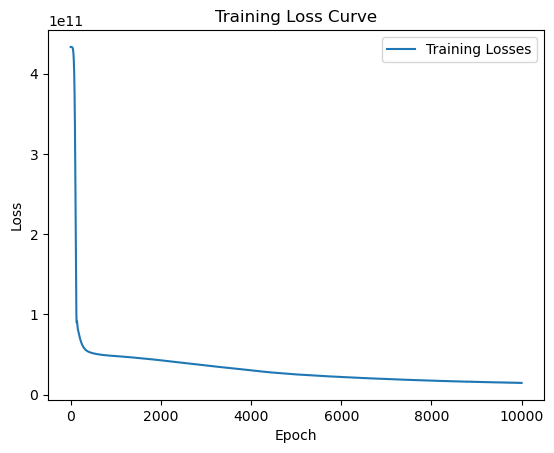

In [40]:
#Converting to numpy arrays
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

#Normalizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Converting to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
Y_train = torch.tensor(Y_train, dtype=torch.float32).view(-1, 1).to(device)
Y_test = torch.tensor(Y_test, dtype=torch.float32).view(-1, 1).to(device)

start_time = time.time()

class HousePricePredictor(nn.Module):
    def __init__(self, input_size):
        super(HousePricePredictor, self).__init__()
        self.fc0 = nn.Linear(input_size, 512)
        self.fc1 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        
        
    def forward(self, x):
        x = torch.relu(self.fc0(x))
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

input_size = X_train.shape[1]
model = HousePricePredictor(input_size).to(device)

#training loop
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_losses = []
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

#Evaluating the model
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, Y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

plt.plot(range(num_epochs), train_losses, label='Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

As can be seen we can achieve a similar magnitude in test loss but using far fewer features and thus speeding up inference time 

The test loss may seem extremely large but this is mostly because of the large size of the testing set and the fact that house prices are also fairly large (of the magnitude 10^6) and thus even the squares of small errors accumulate quickly and lead to a large final loss

# Conclusion

As we can see various factors such as square feet, view, zipcode and more are often found in housing listings. However through data analysis we can identify which features truly matter to consumers (such as square feet, location in the form of zipcode, whether the house has a basement or not, etc.). 

Using this data we can narrow down which features are best analyzed when modelling the price of housing using ML techniques.